In [1]:
# This takes a selection of unsaturated PSF frames from the Altair Fizeau data
# and makes a cube of PSFs that will be used to make a PCA basis set for
# host star subtraction

# created 2018 Oct. 17 by E.S.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from astropy.io import fits
import pandas as pd
from datetime import datetime
%matplotlib inline

In [2]:
# stem 

stem = ('/home/../../media/unasemaje/Elements/lbti_data_reduction/180507_fizeau_altair/03_ramp_removed_pca_background_subted/')

In [3]:
startFrame = 7120
endFrame = 7925 # (inclusive)
#sideLength = 100

In [4]:
# initialize cube

psf_cube = np.nan*np.ones((endFrame-startFrame+1,100,100))

In [5]:
np.shape(psf_cube)

(806, 100, 100)

In [6]:
# read unsaturated PSF cut-outs into a giant cube

counter = 0
for t in range(startFrame,endFrame+1):
    
    img_string = "lm_180507_" + str("{:0>6d}".format(t)) + "_nPCA164.fits"
    
    if ((t >= 7120) and (t <= 7770)):
        psf_loc = [346,806] # nod up
    if (t >= 7771):
        psf_loc = [154,824] # nod down
    
    # if file exists
    if os.path.isfile(stem + img_string):
        print(counter)
        
        # read in image
        sciImg, header = fits.getdata(stem+img_string,0,header=True)

        #print(header["ACTEXP"])
        #print(header["PCCLOSED"]) 
        
        # check header: is exposure time and phase control good?
        if ((header["ACTEXP"] == 145976) and (header["PCCLOSED"] == 1)):
            print("Adding "+str(t)+" to cube")
        
            cutout = sciImg[psf_loc[0]-50:psf_loc[0]+50,psf_loc[1]-50:psf_loc[1]+50]
        
            # add cutout to cube
            psf_cube[counter,:,:] = cutout
            
            # advance counter
            counter += 1
        
        else:
            print("FRAME "+str(t)+" IS BAD")
        
    else:
        
        print('File '+img_string+' not found')
        
# remove leftover NaN slices
psf_cube = psf_cube[0:counter,:,:]

0
FRAME 7120 IS BAD
0
FRAME 7121 IS BAD
0
FRAME 7122 IS BAD
0
Adding 7123 to cube
1
FRAME 7124 IS BAD
1
FRAME 7125 IS BAD
1
FRAME 7126 IS BAD
1
FRAME 7127 IS BAD
1
FRAME 7128 IS BAD
1
FRAME 7129 IS BAD
1
FRAME 7130 IS BAD
1
FRAME 7131 IS BAD
1
FRAME 7132 IS BAD
1
FRAME 7133 IS BAD
1
FRAME 7134 IS BAD
1
FRAME 7135 IS BAD
1
FRAME 7136 IS BAD
1
FRAME 7137 IS BAD
1
FRAME 7138 IS BAD
1
FRAME 7139 IS BAD
1
FRAME 7140 IS BAD
1
FRAME 7141 IS BAD
1
FRAME 7142 IS BAD
1
FRAME 7143 IS BAD
1
FRAME 7144 IS BAD
1
FRAME 7145 IS BAD
1
FRAME 7146 IS BAD
1
FRAME 7147 IS BAD
1
FRAME 7148 IS BAD
1
FRAME 7149 IS BAD
1
Adding 7150 to cube
2
Adding 7151 to cube
3
Adding 7152 to cube
4
Adding 7153 to cube
5
Adding 7154 to cube
6
Adding 7155 to cube
7
Adding 7156 to cube
8
Adding 7157 to cube
9
Adding 7158 to cube
10
Adding 7159 to cube
11
Adding 7160 to cube
12
Adding 7161 to cube
13
Adding 7162 to cube
14
FRAME 7163 IS BAD
14
FRAME 7164 IS BAD
14
FRAME 7165 IS BAD
14
FRAME 7166 IS BAD
14
FRAME 7167 IS BAD
14


In [10]:
# find the mean across all slices in the cube

mean_across_slices = np.mean(psf_cube,axis=0)

#plt.imshow(np.mean(psf_cube,axis=0))
#plt.show()

In [22]:
# subtract the mean from each slice
# (CAUTION: subtract_mean FLAG IN PYNPOINT PCA SUBTRACTION HAS TO BE SET ACCORDINGLY)

psf_cube_minus_mean = np.subtract(psf_cube, mean_across_slices)

In [8]:
# write out each mean-subtracted slice as a FITs file

for sliceNum in range(0,np.shape(psf_cube)[0]):
    #hdu = fits.PrimaryHDU(psf_cube_minus_mean[sliceNum,:,:]) # if you want the mean subtracted
    hdu = fits.PrimaryHDU(psf_cube[sliceNum,:,:])
    hdul = fits.HDUList([hdu])
    hdul.writeto("pynpoint_experimentation_altair/input_place/ref_psf/"+
                         "ref_"+str("{:0>6d}".format(sliceNum))+".fits", overwrite=True)

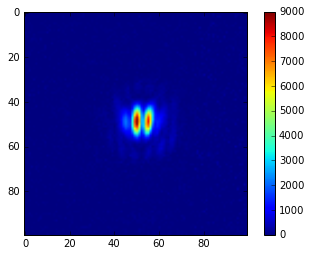

In [18]:
plt.imshow(psf_cube[10,:,:], vmin=0, vmax=9000)
plt.colorbar()
plt.show()

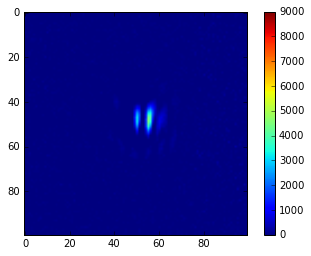

In [19]:
plt.imshow(test[10,:,:], vmin=0, vmax=9000)
plt.colorbar()
plt.show()

In [7]:
            # save the cutout
            hdu = fits.PrimaryHDU(cutout)
            hdul = fits.HDUList([hdu])
            hdul.writeto("pynpoint_experimentation_altair/input_place/ref_psf/"+
                         "cookie_"+img_string, overwrite=True)

(487, 100, 100)

In [22]:
print(psf_cube[10,:,:])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


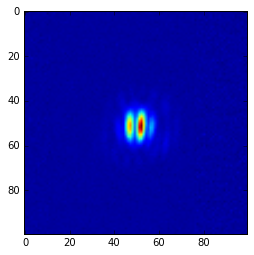

In [12]:
plt.imshow(psf_cube[180,:,:])
plt.show()

In [13]:
# save it

hdu = fits.PrimaryHDU(psf_cube)
hdul = fits.HDUList([hdu])
    
hdul.writeto(stem+'psfs_for_pca_decomp.fits', overwrite=True)

In [ ]:
################################################################################

In [1]:
import urllib
import numpy as np
import matplotlib.pyplot as plt

import PynPoint

from PynPoint import Pypeline
from PynPoint.IOmodules.Hdf5Reading import Hdf5ReadingModule
from PynPoint.IOmodules.FitsWriting import FitsWritingModule
from PynPoint.IOmodules.FitsReading import FitsReadingModule
from PynPoint.ProcessingModules import PSFpreparationModule, \
                                       PcaPsfSubtractionModule, \
                                       ContrastCurveModule, \
                                       FluxAndPosition

In [2]:
# define workspaces and initialize Pypeline

working_place = "./pynpoint_experimentation_altair/working_place/"
input_place = "./pynpoint_experimentation_altair/input_place/"
output_place = "./pynpoint_experimentation_altair/output_place/"

pipeline = Pypeline(working_place_in=working_place,
                    input_place_in=input_place,
                    output_place_in=output_place)

# now a *.ini file has been generated (this includes the PIXSCALE), if no pre-existing one was there

Initiating PynPoint... [DONE]


In [3]:
## NOW, IF NOT DONE BEFORE, EDIT THE *INI FILE FOR 

## PIXSCALE = 0.0107

In [4]:
# read in science FITS files

read_science = FitsReadingModule(name_in="read_science",
                                 input_dir=None,
                                 image_tag="science",
                                 check=True)

pipeline.add_module(read_science)

In [5]:
# read in PSF reference FITS files (i.e., unsaturated frames)

read_ref_psf = FitsReadingModule(name_in="read_ref_psf",
                                 input_dir=input_place+'ref_psf/',
                                 image_tag="ref_psf",
                                 check=True)

pipeline.add_module(read_ref_psf)

In [6]:
## might insert PSF Preparation here later, to upsample and normalize (but not mask! let contrast curve module do that)

In [7]:
# make a contrast curve

'''
cent_size: mask radius
'''

contrast_curve = ContrastCurveModule(name_in="contrast_curve",
                            image_in_tag="science",
                            psf_in_tag="ref_psf",
                            contrast_out_tag="contrast_landscape",
                            pca_out_tag="pca_resids",
                            pca_number=20,
                            psf_scaling=1,
                            separation=(0.25, 0.26, 0.1), 
                            angle=(0.0, 360.0, 360.0), 
                            magnitude=(7.5, 1.0),
                            cent_size=None)

pipeline.add_module(contrast_curve)

In [8]:
pipeline.run()

Validating Pypeline... [DONE]


/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/IOmodules/FitsReading.py:172: UserWarning: Static attribute DIT (=ESO DET DIT) not found in the FITS header.
  % (item[0], fitskey))
/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/IOmodules/FitsReading.py:172: UserWarning: Static attribute LATITUDE (=ESO TEL GEOLAT) not found in the FITS header.
  % (item[0], fitskey))
/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/IOmodules/FitsReading.py:172: UserWarning: Static attribute LONGITUDE (=ESO TEL GEOLON) not found in the FITS header.
  % (item[0], fitskey))
/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/IOmodules/FitsReading.py:207: UserWarning: Non-static attribute EXP_NO (=ESO DET EXP NO) not found in the FITS header.
  "header." % (item[0], fitskey))
/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/IOmodules/FitsReading.py:207: UserWarning: Non-static attribute ND

Running FitsReadingModule... [DONE]
Running FitsReadingModule... [DONE]
Running ContrastCurveModule...
Processing position 1 out of 1.

/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/ProcessingModules/DetectionLimits.py:164: UserWarning: The number of frames in psf_in_tag does not match with the number of frames in image_in_tag. Using the mean of psf_in_tag as PSF template.
  warnings.warn('The number of frames in psf_in_tag does not match with the number of '


........

/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/ProcessingModules/DetectionLimits.py:340: UserWarning: The relative magnitude has become smaller or equal to zero. Adjusting magnitude to 7.5 and step size to 0.1.
  warnings.warn("The relative magnitude has become smaller or equal to "


........................................
Running ContrastCurveModule... [DONE]


/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/ProcessingModules/DetectionLimits.py:350: UserWarning: ContrastModule could not converge at the position of 0.25 arcsec and 0.0 deg.
  "%s arcsec and %s deg." % (sep*pixscale, ang))
/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/ProcessingModules/DetectionLimits.py:362: RuntimeWarning: Mean of empty slice
  np.nanmean(fake_mag, axis=1),
/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/ProcessingModules/DetectionLimits.py:363: RuntimeWarning: Degrees of freedom <= 0 for slice.
  np.nanvar(fake_mag, axis=1),


In [9]:
# confirm PIXSCALE change

pixscale_config = pipeline.get_attribute("config", "PIXSCALE")
print(pixscale_config)
pixscale_prep = pipeline.get_attribute("science", "PIXSCALE")
print(pixscale_prep)

0.0107
0.0107


In [10]:
contrast_curve_results = pipeline.get_data("contrast_landscape")

In [11]:
# contrast curve

# [0]: separation
# [1]: azimuthally averaged contrast limits
# [2]: the azimuthal variance of the contrast limits
# [3]: threshold of the false positive fraction associated with sigma

contrast_curve_results

array([[2.50000000e-01,            nan,            nan, 1.21477003e-04]])

In [ ]:
# make plots

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(contrast_curve_results[:,0],contrast_curve_results[:,1])
ax1.set_title('Azim. averaged contrast limit')
ax1.set_xlabel('Radius (asec)')
ax2.set_ylabel('del_mag')
ax2.plot(contrast_curve_results[:,0],contrast_curve_results[:,3])
ax2.set_title('Threshold of FPF')
ax2.set_xlabel('Radius (asec)')
f.savefig('test.png')

In [ ]:
##########################

In [5]:
# inject fake planets

'''
inject = FluxAndPosition.FakePlanetModule(position=(0.46,0),
                          magnitude=0,
                          psf_scaling=1,
                          name_in="inject",
                          image_in_tag="stack",
                          psf_in_tag="model_psf",
                          image_out_tag="fake_planet_output")

pipeline.add_module(inject)
'''

'\ninject = FluxAndPosition.FakePlanetModule(position=(0.46,0),\n                          magnitude=0,\n                          psf_scaling=1,\n                          name_in="inject",\n                          image_in_tag="stack",\n                          psf_in_tag="model_psf",\n                          image_out_tag="fake_planet_output")\n\npipeline.add_module(inject)\n'

In [6]:
# write out science frames with fake planet

'''
write_inject = FitsWritingModule(file_name="junk_stack_fake_planet.fits",
                              name_in="write_inject",
                              output_dir=output_place,
                              data_tag="fake_planet_output")

pipeline.add_module(write_inject)
'''

'\nwrite_inject = FitsWritingModule(file_name="junk_stack_fake_planet.fits",\n                              name_in="write_inject",\n                              output_dir=output_place,\n                              data_tag="fake_planet_output")\n\npipeline.add_module(write_inject)\n'

In [20]:
# prepare psf


prep_fake_planet = PSFpreparationModule(name_in="prep_fake_planet",
                            image_in_tag="stack",
                            image_out_tag="prep",
                            image_mask_out_tag=None,
                            mask_out_tag=None,
                            norm=False,
                            resize=None,
                            cent_size=0.15,
                            edge_size=1.1)

pipeline.add_module(prep_fake_planet)

In [21]:
pipeline.run()

# after running the pipeline, hdf5 attributes like PIXSCALE for groups
# other than /config/ should be available

Validating Pypeline... [DONE]
Running Hdf5ReadingModule... [DONE]
Running FitsReadingModule... [DONE]
Running PSFpreparationModule... [DONE]


In [22]:
pixscale_config = pipeline.get_attribute("config", "PIXSCALE")
print(pixscale_config)
pixscale_prep = pipeline.get_attribute("prep", "PIXSCALE")
print(pixscale_prep)

0.0107
0.027


In [7]:
print(pixscale_config)

0.027


In [8]:
# write out prepped psf

'''
# checks HDF5 file
write_prep = FitsWritingModule(file_name="junk_prep.fits",
                              name_in="write_prep",
                              output_dir=output_place,
                              data_tag="prep")

#pipeline.add_module(write_prep)
'''

'\n# checks HDF5 file\nwrite_prep = FitsWritingModule(file_name="junk_prep.fits",\n                              name_in="write_prep",\n                              output_dir=output_place,\n                              data_tag="prep")\n\n#pipeline.add_module(write_prep)\n'

In [7]:
# do PCA PSF subtraction

'''
pca = PcaPsfSubtractionModule(pca_numbers=(5, ),
                              name_in="pca",
                              images_in_tag="fake_planet_output",
                              reference_in_tag="fake_planet_output",
                              res_mean_tag="mean_residuals",
                              res_median_tag="median_residuals",
                              res_arr_out_tag="all_resids",
                              res_rot_mean_clip_tag="resid_rot",
                              verbose=True)

pipeline.add_module(pca)

# note:
# images_in_tag: science images
# reference_in_tag: reference images, which COULD be the science images
'''

In [7]:
## THIS IS TEST ONLY ## do PCA PSF subtraction

'''
pca = PcaPsfSubtractionModule(pca_numbers=(5, ),
                              name_in="pca",
                              images_in_tag="read_science",
                              reference_in_tag="read_science",
                              res_mean_tag="mean_residuals",
                              res_median_tag="median_residuals",
                              res_arr_out_tag="all_resids",
                              res_rot_mean_clip_tag="resid_rot",
                              verbose=True)

pipeline.add_module(pca)
'''
# note:
# images_in_tag: science images
# reference_in_tag: reference images, which COULD be the science images

In [8]:
# write out outputs from PCA PSF subtraction

'''
# checks HDF5 file
read_test1 = FitsWritingModule(file_name="junk_mean_residuals.fits",
                              name_in="read_test1",
                              output_dir=output_place,
                              data_tag="mean_residuals")

pipeline.add_module(read_test1)
'''

In [9]:
# write out outputs from PCA PSF subtraction

'''
# checks HDF5 file
read_test2 = FitsWritingModule(file_name="junk_median_residuals.fits",
                              name_in="read_test2",
                              output_dir=output_place,
                              data_tag="median_residuals")

pipeline.add_module(read_test2)
'''

In [10]:
# write out outputs from PCA PSF subtraction

'''
# checks HDF5 file
read_test4 = FitsWritingModule(file_name="junk_resid_rot.fits",
                              name_in="read_test4",
                              output_dir=output_place,
                              data_tag="resid_rot")

pipeline.add_module(read_test4)
'''

In [6]:
# make a contrast curve

'''
cent_size: mask radius
'''

contrast_curve = ContrastCurveModule(name_in="contrast_curve",
                            image_in_tag="prep",
                            psf_in_tag="model_psf",
                            contrast_out_tag="contrast_landscape",
                            pca_out_tag="pca_resids",
                            pca_number=20,
                            psf_scaling=1,
                            separation=(0.1, 1.0, 0.1), 
                            angle=(0.0, 360.0, 60.0), 
                            magnitude=(7.5, 1.0),
                            cent_size=None)

pipeline.add_module(contrast_curve)

In [9]:
pipeline.run()

Validating Pypeline... [DONE]


AssertionError: Error: Input file does not exist. Input requested: BetaPic_NACO_Mp.hdf5

In [11]:
contrast_curve_results = pipeline.get_data("contrast_landscape")
#residuals = pipeline.get_data("residuals")
#pixscale = pipeline.get_attribute("stack", "PIXSCALE")

#size = pixscale*np.size(residuals, 1)/2.

In [12]:
# contrast curve

# [0]: separation
# [1]: azimuthally averaged contrast limits
# [2]: the azimuthal variance of the contrast limits
# [3]: threshold of the false positive fraction associated with sigma

contrast_curve_results

array([[1.00000000e-01,            nan,            nan, 3.74521694e-03],
       [2.00000000e-01,            nan,            nan, 2.68666801e-04],
       [3.00000000e-01, 5.07657121e+00, 1.80844893e-01, 6.54338490e-05],
       [4.00000000e-01, 4.73267286e+00, 8.75829719e-02, 2.33216658e-05],
       [5.00000000e-01, 4.57947726e+00, 1.54244613e-02, 1.26831579e-05],
       [6.00000000e-01, 6.79627759e+00, 7.58776386e-02, 8.02141316e-06],
       [7.00000000e-01, 7.15955594e+00, 8.30756762e-02, 5.60807982e-06],
       [8.00000000e-01, 7.48905131e+00, 4.07430502e-02, 4.03083259e-06],
       [9.00000000e-01, 7.51861472e+00, 1.13346032e-02, 3.20495930e-06]])

In [20]:


f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(contrast_curve_results[:,0],contrast_curve_results[:,1])
ax1.set_title('Azim. averaged contrast limit')
ax1.set_xlabel('Radius (asec)')
ax2.set_ylabel('del_mag')
ax2.plot(contrast_curve_results[:,0],contrast_curve_results[:,3])
ax2.set_title('Threshold of FPF')
ax2.set_xlabel('Radius (asec)')
f.savefig('test.png')

In [19]:
plt.imshow(residuals[0, ], origin='lower', extent=[size, -size, -size, size])
plt.title("beta Pic b - NACO M' - mean residuals")
plt.xlabel('R.A. offset [arcsec]', fontsize=12)
plt.ylabel('Dec. offset [arcsec]', fontsize=12)
plt.colorbar()
#plt.show()
plt.savefig(output_place+"residuals.png")

NameError: name 'residuals' is not defined

In [13]:
pipeline

In [19]:
np.size(residuals)

NameError: name 'residuals' is not defined

In [10]:
pipeline.add_module(writefits)

/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/PynPoint/Core/Pypeline.py:257: UserWarning: Processing module names need to be unique. Overwriting module 'fits_write'.
  % module.name)


In [11]:
writefits.run()

Running FitsWritingModule... [DONE]
